In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
# Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
df = pd.read_csv('fcc-forum-pageviews.csv')
df.set_index('date', drop=True, inplace=True)
# pd.Timestamp method is used to convert index values into panda's timestamp object
# converting to timestamp object will give us a chance to automatically format the index for charts
df.index = [pd.Timestamp(dt) for dt in df.index]



df.head()



,value
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [10]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

# Clean data
# greater than %2.5 percentile, and less then  %97.5 percentile
df['value'] = df[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]

In [11]:
def draw_line_plot():
    # Draw line plot
    fig, axis = plt.subplots(1, 1)

    fig.set_figwidth(15)
    fig.set_figheight(5)

    plt.plot(df.index, df['value'], color='r', linewidth=1)

    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig




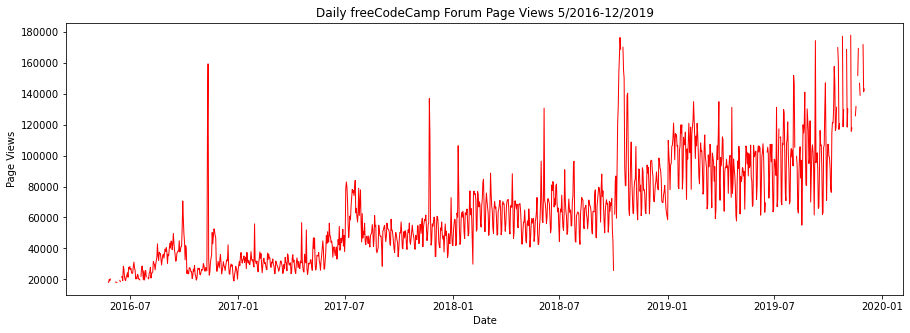

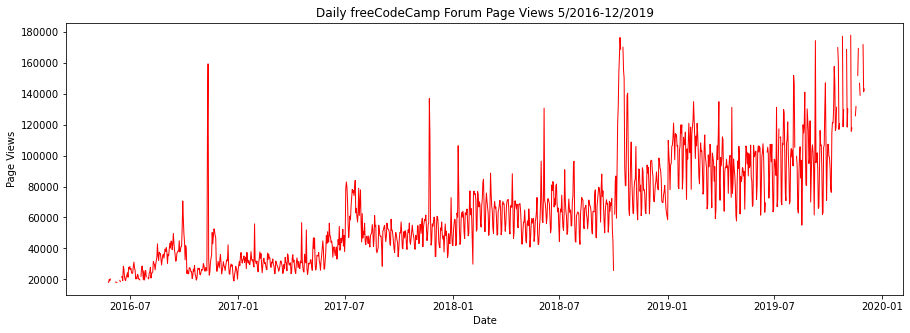

In [12]:
draw_line_plot()

In [14]:

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    # we have to copy so do not pass by reference
    df_bar = df.copy()

    df_bar['Date'] = df_bar.index
    # strftime('%Y') is the time format code for Year
    df_bar['Year'] = df_bar['Date'].map(lambda x: x.strftime('%Y'))
    # strftime('%B') is the time format code for Full Month name
    df_bar['Month'] = df_bar['Date'].map(lambda x: x.strftime('%B'))
    df_bar = pd.DataFrame({'Average Page Views':df_bar.groupby(['Year', 'Month'])['value'].mean()
                          }).reset_index().sort_values(['Year', 'Month'], ascending=[1, 1])

    # Draw bar plot
    month_label = ["January", "February", "March", "April", "May", "June", "July","August", "September", "October", "November", "December"]

    fig, ax = plt.subplots(figsize=(20, 15))

    bar_plot = sns.barplot(x='Year',y='Average Page Views',palette="deep",hue='Month',hue_order=month_label,data=df_bar)

    ax.set_ylabel("Average Page Views", fontsize='24')
    ax.set_xlabel("Years", fontsize='24')
    ax.legend(loc=2, fontsize='24')

    ax.tick_params(axis='both', which='major', labelsize=24)
    plt.xticks(rotation=90, horizontalalignment="center")
    sns.set(style="whitegrid", font_scale=5)

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig



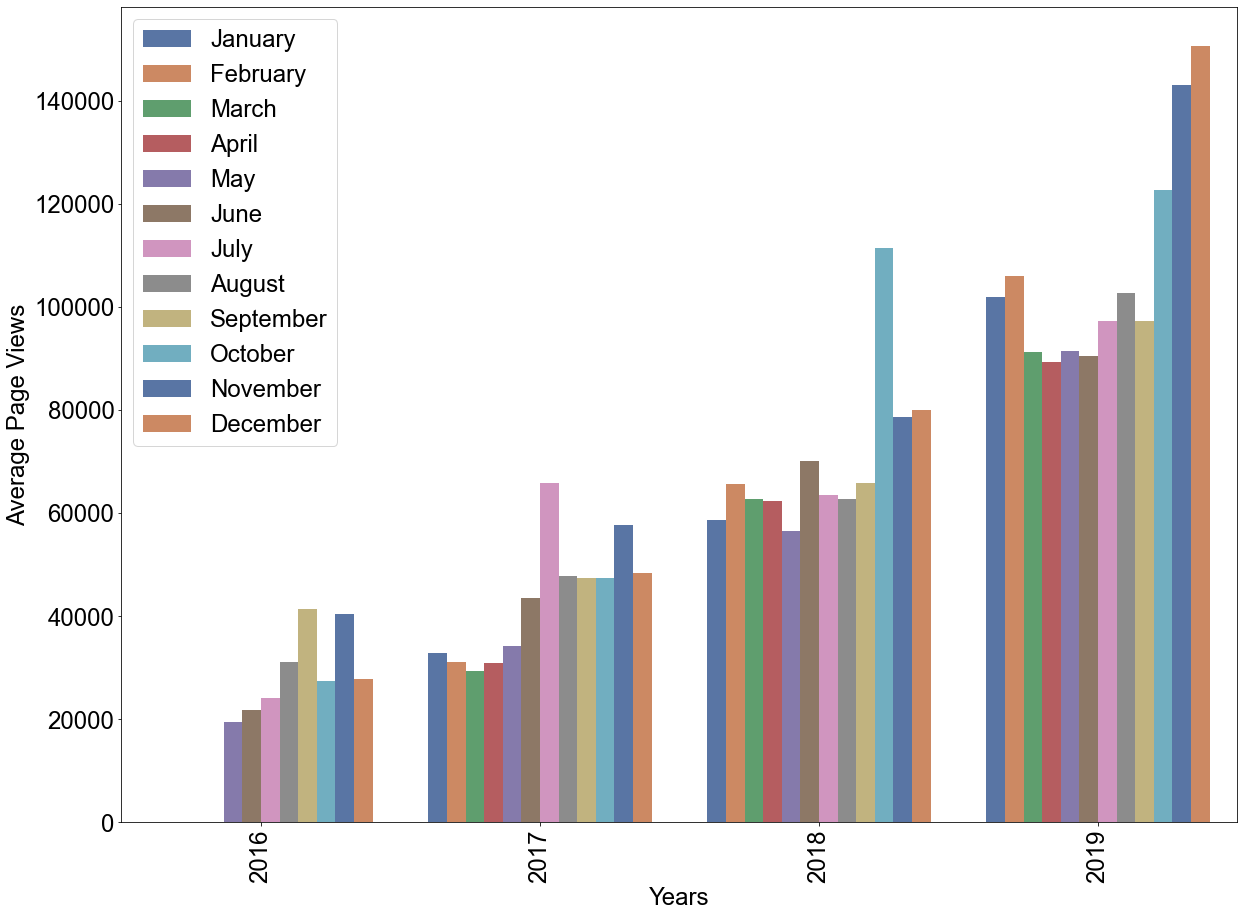

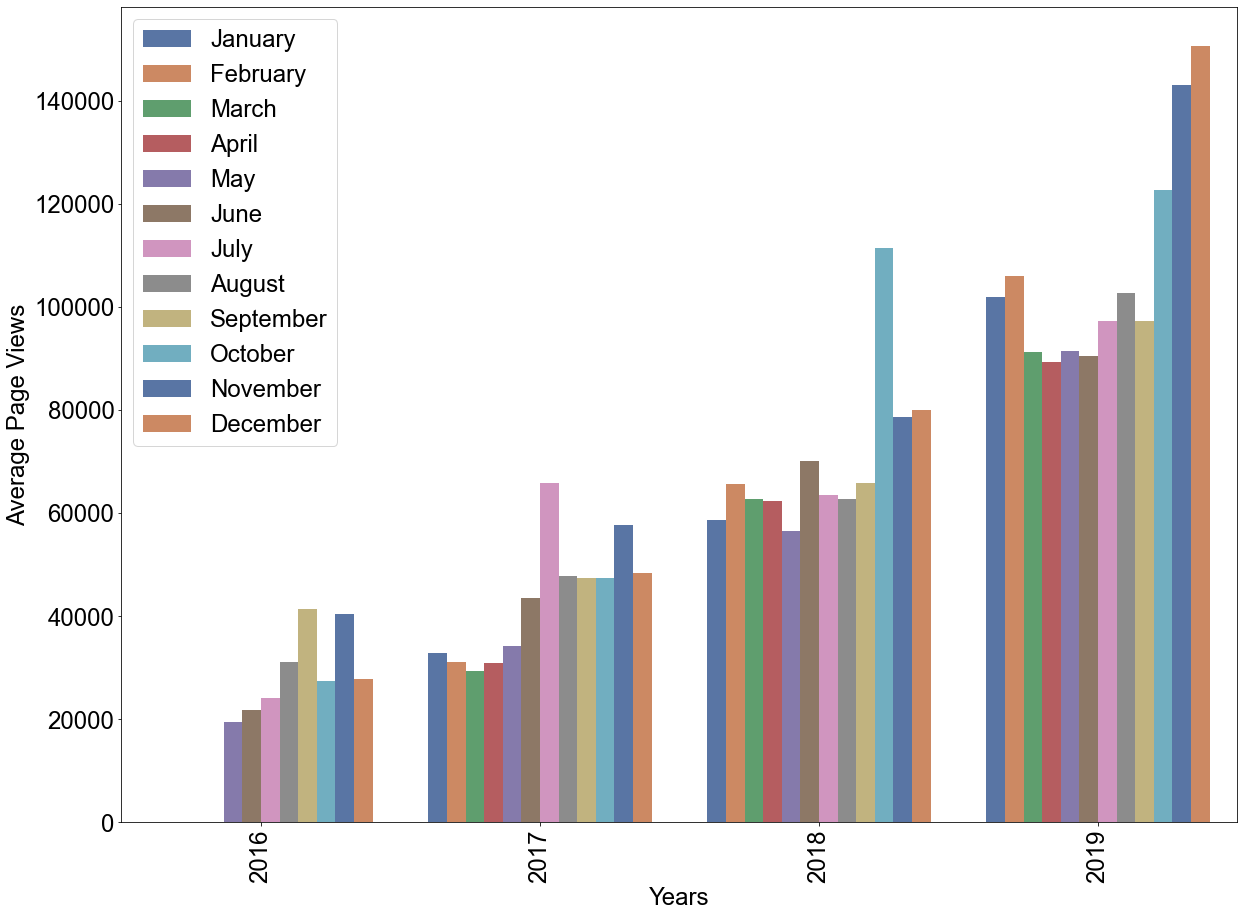

In [15]:
draw_bar_plot()

In [17]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box['date'] = df_box.index
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    # b code for abbreviated month name
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)

    # %m for m	Month as a zero-padded decimal number.
    df_box['smonth'] = [d.strftime('%m') for d in df_box.date]

    df_box = df_box.sort_values(by='smonth')

    fig, axes = plt.subplots(1, 2)
    fig.set_figwidth(18)
    fig.set_figheight(6)

    axes[0].set_title("Year-wise Box Plot (Trend)", fontsize='16')
    axes[1].set_title("Month-wise Box Plot (Seasonality)", fontsize='16')

    axes[0] = sns.boxplot(x=df_box.year, y=df_box.value, ax=axes[0])
    axes[0].set_xlabel('Year', fontsize='10')
    axes[0].set_ylabel('Page Views', fontsize='10')

    axes[1] = sns.boxplot(x="month", y="value", data=df_box, ax=axes[1])
    axes[1].set_xlabel('Month', fontsize='10')
    axes[1].set_ylabel('Page Views', fontsize='10')

    axes[0].tick_params(axis='both', which='major', labelsize=14)
    axes[1].tick_params(axis='both', which='major', labelsize=14)

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

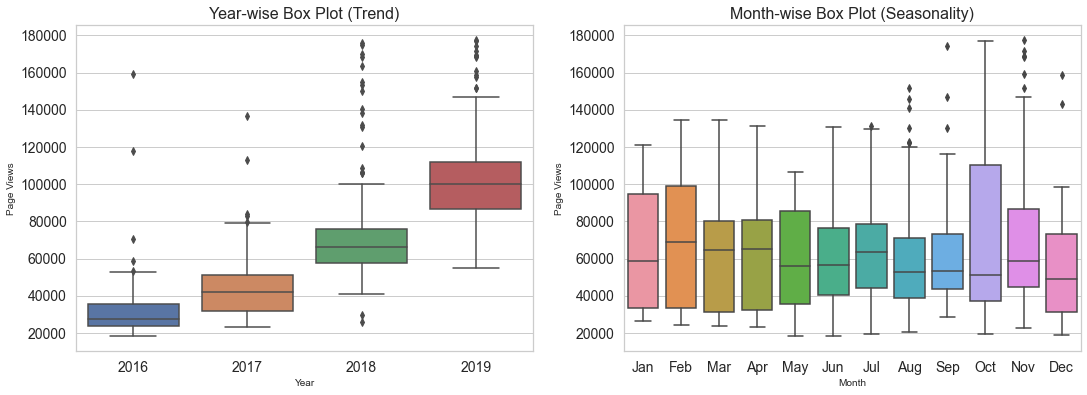

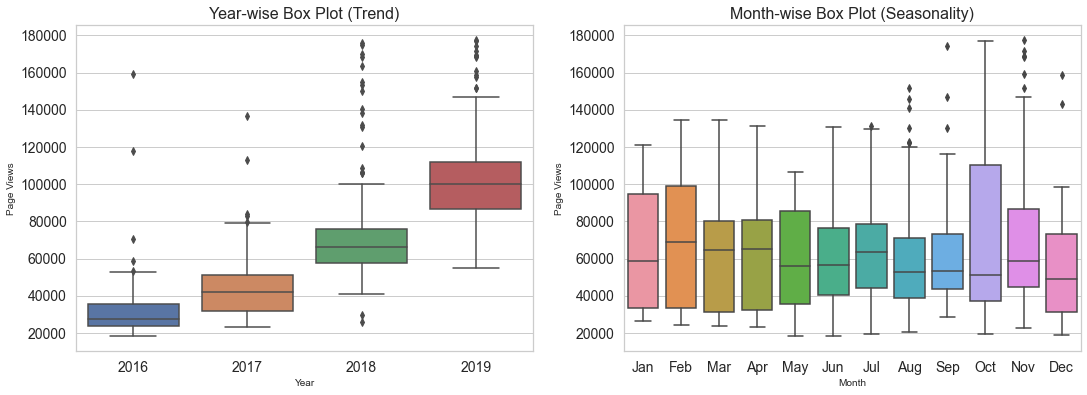

In [18]:
draw_box_plot()